# Importing necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# Importing Data

In [2]:
data = pd.read_csv('parkinson_data.csv')
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [4]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Comparison of Average vocal fundamental frequency of Patients to Non-patients

In [5]:
parkinson_healthy = data.loc[data['status'] == 0]

In [6]:
len(parkinson_healthy)

48

In [7]:
parkinson_patient = data.loc[data['status'] == 1]

In [8]:
len(parkinson_patient)

147

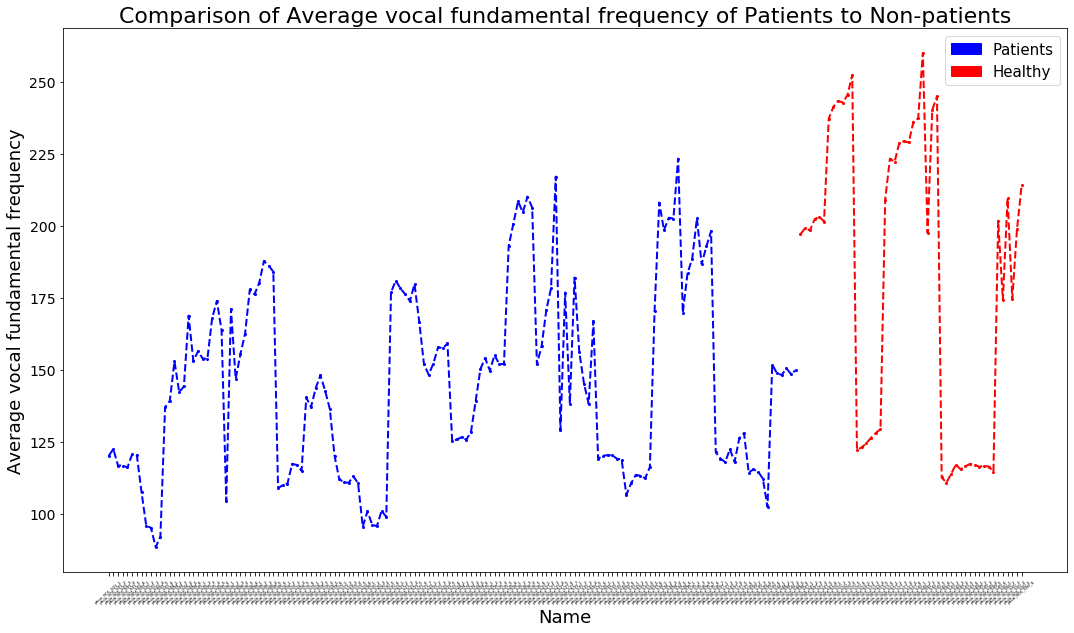

In [9]:
plt.figure(figsize=(18,10))
plt.plot(parkinson_patient['name'], parkinson_patient['MDVP:Fo(Hz)'], color = 'b',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)
plt.plot(parkinson_healthy['name'], parkinson_healthy['MDVP:Fo(Hz)'], color = 'r',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)

plt.xlabel('Name', fontsize=18)
plt.xticks(rotation=40, fontsize = 4)
plt.ylabel('Average vocal fundamental frequency', fontsize=18)
plt.yticks(fontsize = 14)
plt.title('Comparison of Average vocal fundamental frequency of Patients to Non-patients', fontsize=22)
blue = patches.Patch(color='blue', label='Patients')
red = patches.Patch(color='red', label='Healthy')
plt.legend(handles=[blue, red], prop = {'size':15})

### Amplitude correlation between Patients and Non-patients

In [10]:
first_sample = parkinson_patient.sample(n = 48)

In [11]:
first_sample.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
154,phon_R01_S37_2,119.100,128.442,88.833,0.00692,0.00006,0.00393,0.00300,0.01179,0.02682,...,0.04451,0.04611,21.824,1,0.651680,0.659333,-4.239028,0.175691,2.451130,0.247455
86,phon_R01_S21_3,178.222,202.450,141.047,0.00321,0.00002,0.00163,0.00194,0.00488,0.03759,...,0.06219,0.03151,15.924,1,0.598714,0.712199,-6.366916,0.335753,2.654271,0.144614
164,phon_R01_S39_6,102.273,142.830,85.902,0.00907,0.00009,0.00493,0.00461,0.01480,0.02814,...,0.04736,0.03882,18.447,1,0.671378,0.674562,-2.929379,0.396746,2.560422,0.367233
18,phon_R01_S05_1,153.046,175.829,68.623,0.00742,0.00005,0.00364,0.00432,0.01092,0.05517,...,0.07413,0.03160,17.280,1,0.665318,0.719467,-3.949079,0.357870,3.109010,0.377429
133,phon_R01_S32_6,118.747,123.723,109.836,0.00331,0.00003,0.00168,0.00171,0.00504,0.01043,...,0.01471,0.00504,25.619,1,0.482296,0.723096,-6.448134,0.178713,2.034827,0.141422


In [12]:
second_sample = parkinson_patient.sample(n = 48)

In [13]:
second_sample.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
82,phon_R01_S20_5,100.960,110.019,95.628,0.00606,0.00006,0.00351,0.00348,0.01053,0.02427,...,0.04114,0.01237,20.536,1,0.554610,0.787896,-5.022288,0.146948,2.428306,0.264666
75,phon_R01_S19_4,110.707,122.611,105.007,0.00516,0.00005,0.00277,0.00289,0.00831,0.02215,...,0.03851,0.00472,25.197,1,0.463514,0.807217,-5.477592,0.315074,1.862092,0.228624
140,phon_R01_S34_1,170.368,268.796,79.543,0.00571,0.00003,0.00232,0.00269,0.00696,0.03273,...,0.05139,0.02485,18.540,1,0.677131,0.685057,-4.796845,0.397749,2.963799,0.277227
74,phon_R01_S19_3,110.793,128.101,107.316,0.00494,0.00004,0.00260,0.00283,0.00780,0.02442,...,0.04295,0.00479,25.438,1,0.437031,0.815908,-5.313360,0.201861,2.225815,0.244512
12,phon_R01_S04_1,136.926,159.866,131.276,0.00293,0.00002,0.00118,0.00153,0.00355,0.01259,...,0.01968,0.00581,25.703,1,0.460600,0.646846,-6.547148,0.152813,2.041277,0.138512


In [14]:
third_sample = parkinson_patient.sample(n = 48)

In [15]:
third_sample.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
154,phon_R01_S37_2,119.100,128.442,88.833,0.00692,0.00006,0.00393,0.00300,0.01179,0.02682,...,0.04451,0.04611,21.824,1,0.651680,0.659333,-4.239028,0.175691,2.451130,0.247455
21,phon_R01_S05_4,153.880,172.860,78.128,0.00480,0.00003,0.00232,0.00267,0.00696,0.04137,...,0.06062,0.01849,19.493,1,0.629017,0.698951,-5.186960,0.237622,2.557536,0.259765
39,phon_R01_S08_4,187.733,202.324,173.015,0.00316,0.00002,0.00168,0.00182,0.00504,0.01663,...,0.02488,0.00265,26.310,1,0.396793,0.758324,-6.006647,0.266892,2.382544,0.160691
92,phon_R01_S22_2,148.272,164.989,142.299,0.00459,0.00003,0.00250,0.00256,0.00750,0.04190,...,0.07150,0.01914,18.780,1,0.454444,0.734504,-5.952058,0.087840,2.344336,0.186489
40,phon_R01_S08_5,186.163,197.724,177.584,0.00298,0.00002,0.00165,0.00175,0.00496,0.01495,...,0.02321,0.00231,26.822,1,0.326480,0.765623,-6.647379,0.201095,2.374073,0.130554


In [16]:
concatenation = pd.concat([parkinson_healthy, first_sample])
random_sampling = concatenation.sample(n = 48)

In [17]:
second_concatenation = pd.concat([parkinson_healthy, second_sample])

In [18]:
third_concatenation = pd.concat([parkinson_healthy, third_sample])

#### First Sample

(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
         0.16,  0.18]), <a list of 11 Text yticklabel objects>)

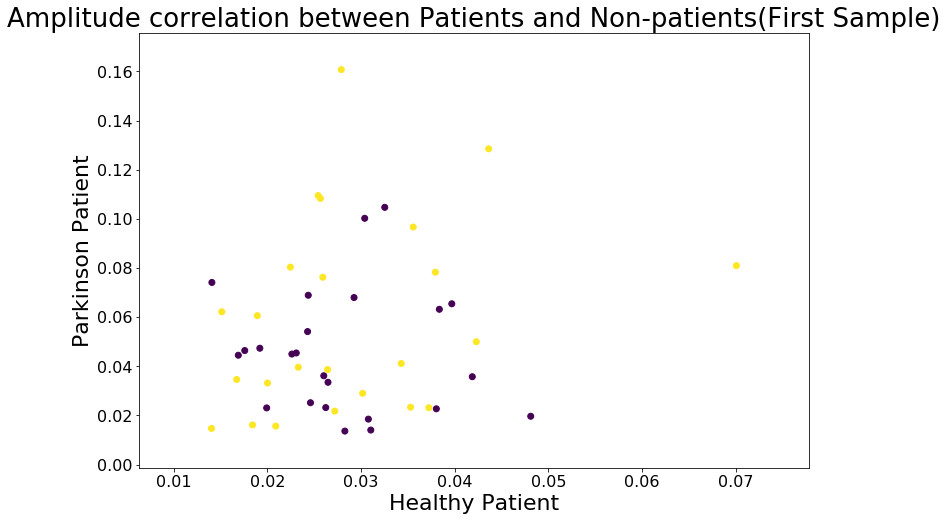

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(parkinson_healthy['Shimmer:DDA'], first_sample['Shimmer:DDA'], c = random_sampling['status'])
plt.title('Amplitude correlation between Patients and Non-patients(First Sample)', fontsize=26)
plt.xlabel('Healthy Patient', fontsize=22)
plt.xticks(fontsize = 16)
plt.ylabel('Parkinson Patient', fontsize=22)
plt.yticks(fontsize = 16)

#### Second Sample

(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
         0.16,  0.18]), <a list of 11 Text yticklabel objects>)

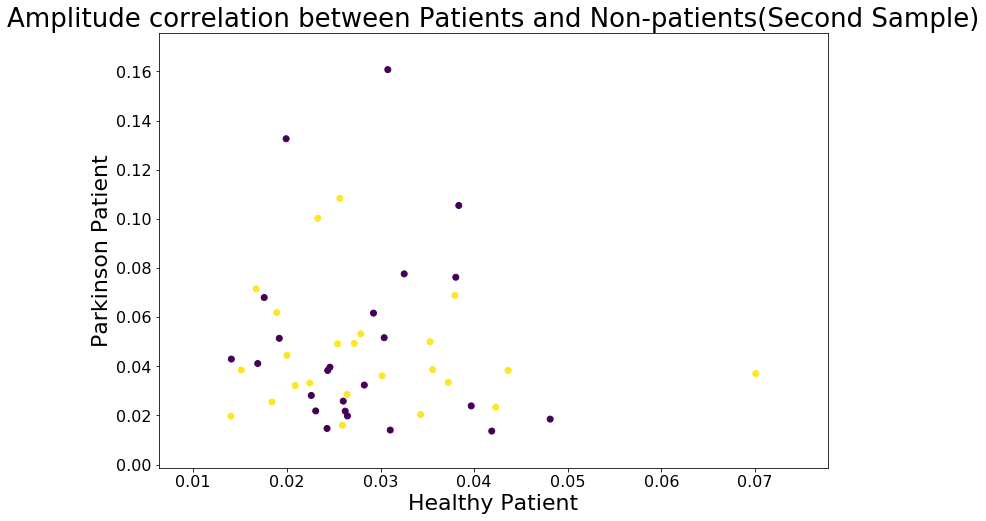

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(parkinson_healthy['Shimmer:DDA'], second_sample['Shimmer:DDA'], c = random_sampling['status'])
plt.title('Amplitude correlation between Patients and Non-patients(Second Sample)', fontsize=26)
plt.xlabel('Healthy Patient', fontsize=22)
plt.xticks(fontsize = 16)
plt.ylabel('Parkinson Patient', fontsize=22)
plt.yticks(fontsize = 16)

#### Third Sample

(array([-0.025,  0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,
         0.175,  0.2  ]), <a list of 10 Text yticklabel objects>)

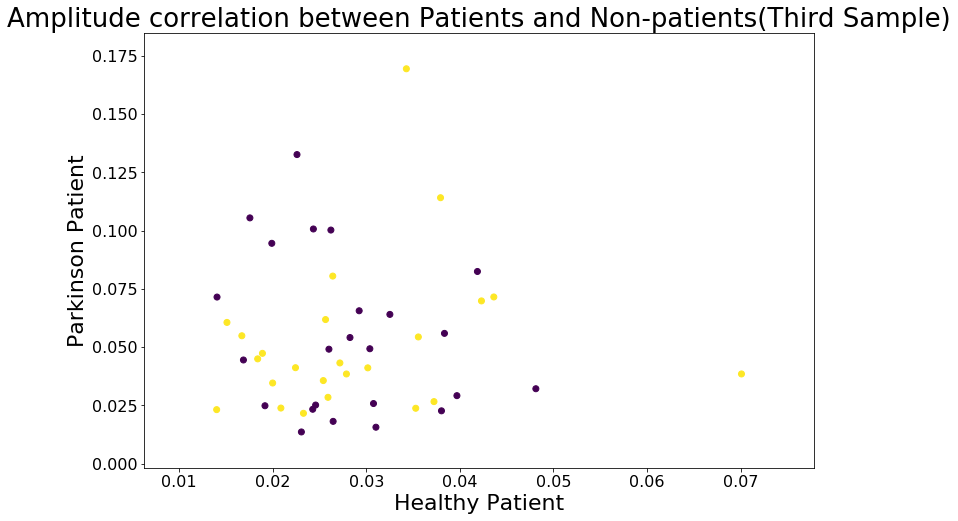

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(parkinson_healthy['Shimmer:DDA'], third_sample['Shimmer:DDA'], c = random_sampling['status'])
plt.title('Amplitude correlation between Patients and Non-patients(Third Sample)', fontsize=26)
plt.xlabel('Healthy Patient', fontsize=22)
plt.xticks(fontsize = 16)
plt.ylabel('Parkinson Patient', fontsize=22)
plt.yticks(fontsize = 16)

#### Confirming correlation with a line plot

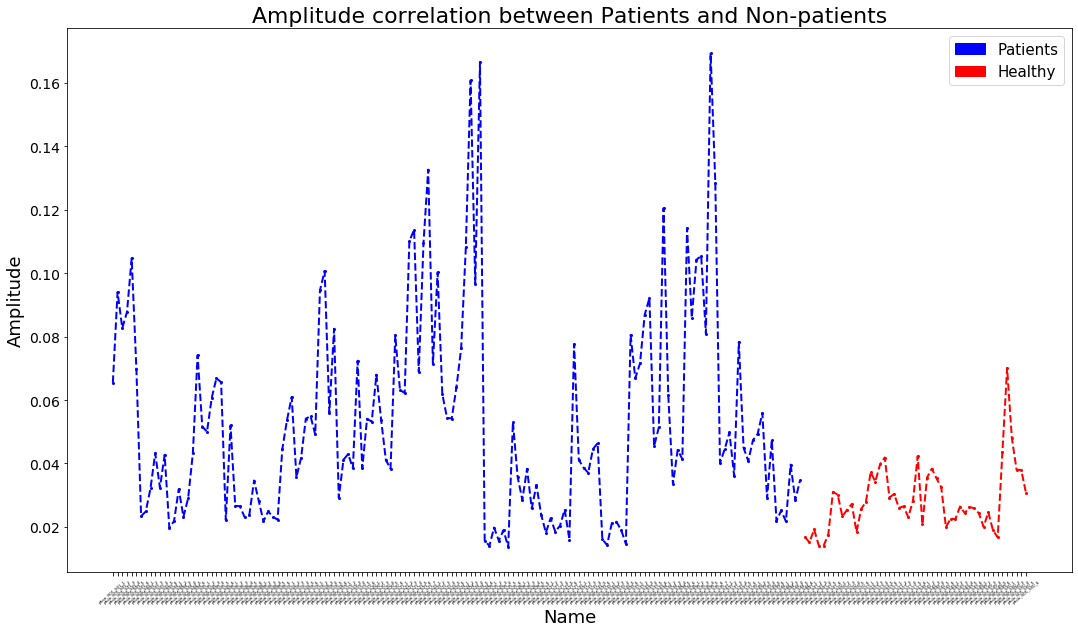

In [22]:
plt.figure(figsize=(18,10))
plt.plot(parkinson_patient['name'], parkinson_patient['Shimmer:DDA'], color = 'b',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)
plt.plot(parkinson_healthy['name'], parkinson_healthy['Shimmer:DDA'], color = 'r',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)

plt.xlabel('Name', fontsize=18)
plt.xticks(rotation=40, fontsize = 4)
plt.ylabel('Amplitude', fontsize=18)
plt.yticks(fontsize = 14)
plt.title('Amplitude correlation between Patients and Non-patients', fontsize=22)
blue = patches.Patch(color='blue', label='Patients')
red = patches.Patch(color='red', label='Healthy')
plt.legend(handles=[blue, red], prop = {'size':15})

### Noise to Tonal Component of Patients & Non-patients 

In [23]:
def ecdf(data):
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

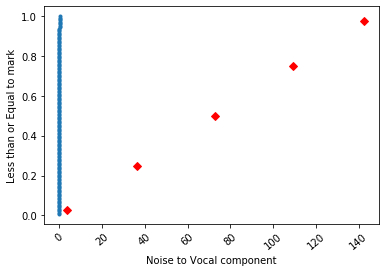

In [24]:
x_values, y_values = ecdf(parkinson_patient['NHR'])
# Plot the ECDF
_ = plt.plot(x_values, y_values, '.')
_ = plt.xlabel('Noise to Vocal component', fontsize=10)
_ = plt.xticks(rotation=40, fontsize = 10)
_ = plt.ylabel('Less than or Equal to mark', fontsize=10)
_ = plt.yticks(fontsize = 10)

# Overlay percentiles as red x's
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ppn_ptiles_towns = np.percentile(range(len(parkinson_patient['NHR'])), percentiles)
_ = plt.plot(ppn_ptiles_towns, percentiles/100, marker='D', color='red',
         linestyle='none')


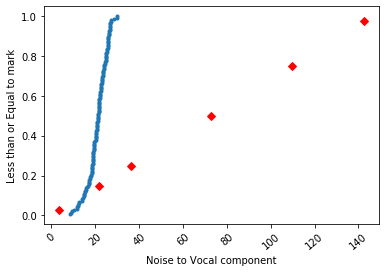

In [25]:
x_values, y_values = ecdf(parkinson_patient['HNR'])
# Plot the ECDF
_ = plt.plot(x_values, y_values, '.')
_ = plt.xlabel('Noise to Vocal component', fontsize=10)
_ = plt.xticks(rotation=40, fontsize = 10)
_ = plt.ylabel('Less than or Equal to mark', fontsize=10)
_ = plt.yticks(fontsize = 10)

# Overlay percentiles as red x's
percentiles = np.array([2.5, 15, 25, 50, 75, 97.5])
pph_ptiles_towns = np.percentile(range(len(parkinson_patient['HNR'])), percentiles)
_ = plt.plot(pph_ptiles_towns, percentiles/100, marker='D', color='red',
         linestyle='none')


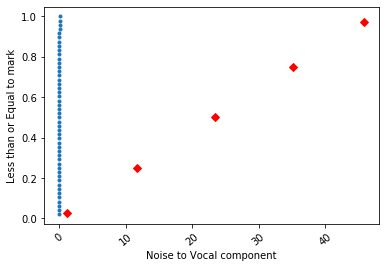

In [26]:
x_values, y_values = ecdf(parkinson_healthy['NHR'])
# Plot the ECDF
_ = plt.plot(x_values, y_values, '.')
_ = plt.xlabel('Noise to Vocal component', fontsize=10)
_ = plt.xticks(rotation=40, fontsize = 10)
_ = plt.ylabel('Less than or Equal to mark', fontsize=10)
_ = plt.yticks(fontsize = 10)


# Overlay percentiles as red x's
percentiles = np.array([2.5, 25, 50, 75, 97.5])
phn_ptiles_towns = np.percentile(range(len(parkinson_healthy['NHR'])), percentiles)
_ = plt.plot(phn_ptiles_towns, percentiles/100, marker='D', color='red',
         linestyle='none')


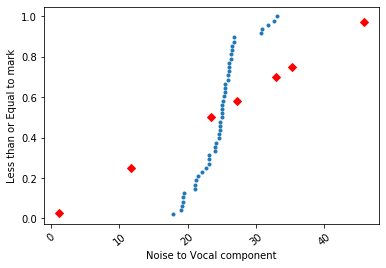

In [27]:
x_values, y_values = ecdf(parkinson_healthy['HNR'])
# Plot the ECDF
_ = plt.plot(x_values, y_values, '.')
_ = plt.xlabel('Noise to Vocal component', fontsize=10)
_ = plt.xticks(rotation=40, fontsize = 10)
_ = plt.ylabel('Less than or Equal to mark', fontsize=10)
_ = plt.yticks(fontsize = 10)


# Overlay percentiles as red x's
percentiles = np.array([2.5, 25, 50, 58, 70, 75, 97.5])
phh_ptiles_towns = np.percentile(range(len(parkinson_healthy['HNR'])), percentiles)
_ = plt.plot(phh_ptiles_towns, percentiles/100, marker='D', color='red',
         linestyle='none')

#### Confirming hypothesis with a line plot

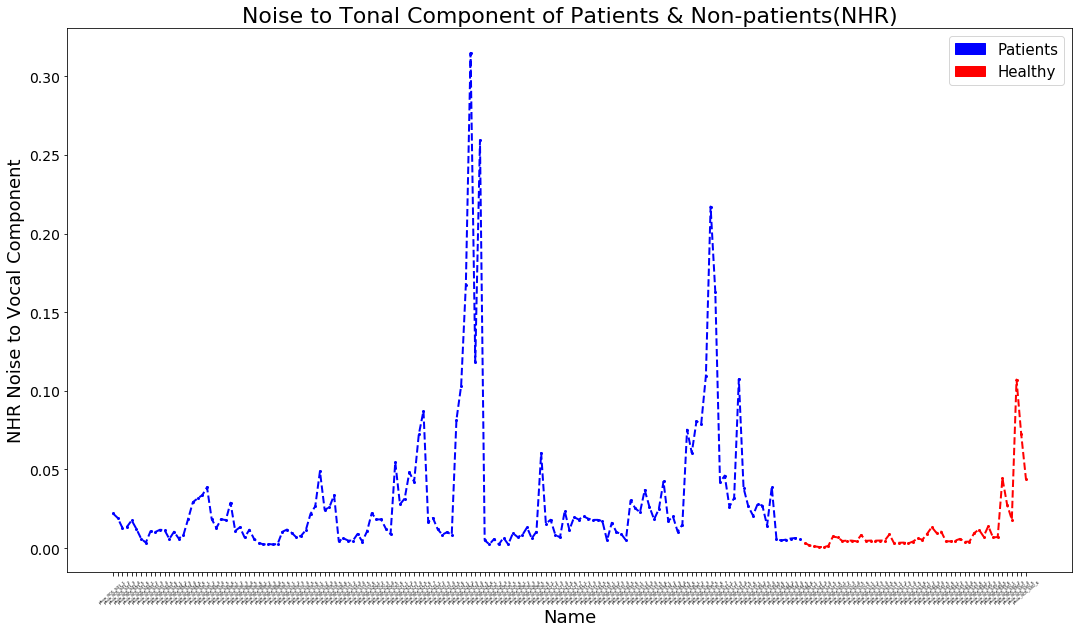

In [28]:
plt.figure(figsize=(18,10))
plt.plot(parkinson_patient['name'], parkinson_patient['NHR'], color = 'b',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)
plt.plot(parkinson_healthy['name'], parkinson_healthy['NHR'], color = 'r',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)

plt.xlabel('Name', fontsize=18)
plt.xticks(rotation=40, fontsize = 4)
plt.ylabel('NHR Noise to Vocal Component', fontsize=18)
plt.yticks(fontsize = 14)
plt.title('Noise to Tonal Component of Patients & Non-patients(NHR)', fontsize=22)
blue = patches.Patch(color='blue', label='Patients')
red = patches.Patch(color='red', label='Healthy')
plt.legend(handles=[blue, red], prop = {'size':15})

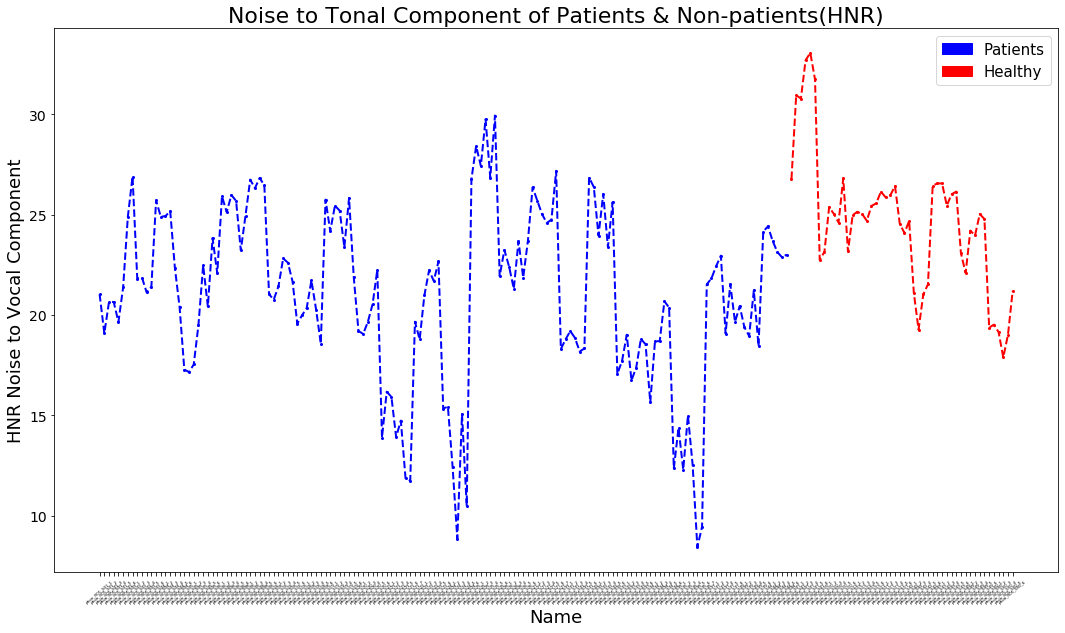

In [29]:
plt.figure(figsize=(18,10))
plt.plot(parkinson_patient['name'], parkinson_patient['HNR'], color = 'b',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)
plt.plot(parkinson_healthy['name'], parkinson_healthy['HNR'], color = 'r',marker='o', 
         linestyle='dashed', linewidth=2, markersize=2)

plt.xlabel('Name', fontsize=18)
plt.xticks(rotation=40, fontsize = 4)
plt.ylabel('HNR Noise to Vocal Component', fontsize=18)
plt.yticks(fontsize = 14)
plt.title('Noise to Tonal Component of Patients & Non-patients(HNR)', fontsize=22)
blue = patches.Patch(color='blue', label='Patients')
red = patches.Patch(color='red', label='Healthy')
plt.legend(handles=[blue, red], prop = {'size':15})

# ML model

### Logistic Regression

In [30]:
X = data.drop(['status','name'], axis = 1)
y = data['status']

In [31]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [33]:
logreg = LogisticRegression()

In [34]:
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
logreg.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [36]:
logreg.score(X_test, y_test)

0.9230769230769231

### Gradient Boosting

In [37]:
X = data.drop(['status','name'], axis = 1)
y = data['status']

In [38]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [40]:
gb = GradientBoostingClassifier(n_estimators = 500, max_depth = 1, random_state = 52)

In [41]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=52, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [42]:
gb.score(X_test, y_test)

0.9230769230769231